# Import Required Libraries

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from google.colab import files
import zipfile

# Upload the DataSet

Please upload the dataset ZIP file.


Saving isolated_words_per_user (1).zip to isolated_words_per_user (1).zip
Number of images loaded: 8144
Image dimensions (after resizing): (128, 256)
Unique users (labels): 82


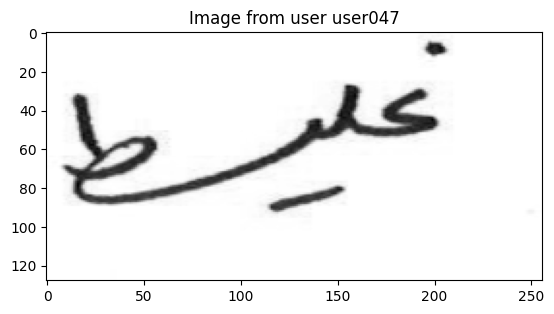

In [ ]:


# Function to load images from a folder
def load_images_from_folder(folder_path):
    images = []
    labels = []

    # Iterate through user folders
    for user_folder in os.listdir(folder_path):
        user_path = os.path.join(folder_path, user_folder)
        if os.path.isdir(user_path):
            for image_file in os.listdir(user_path):
                img_path = os.path.join(user_path, image_file)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load image in grayscale
                if img is not None:
                    images.append(img)
                    labels.append(user_folder)  # Store the folder name as the label (user ID)
                else:
                    print(f"Warning: Skipping corrupted image {img_path}")
    return images, labels

# Function to preprocess images: Resize to 256x128
def preprocess_images(images, size=(256, 128)):
    processed_images = []
    for img in images:
        resized_img = cv2.resize(img, size)  # Resize images
        processed_images.append(resized_img)
    return processed_images

# Upload the zip file containing the dataset from your local machine
print("Please upload the dataset ZIP file.")
uploaded = files.upload()

# Unzip the dataset
dataset_zip = list(uploaded.keys())[0]
with zipfile.ZipFile(dataset_zip, 'r') as zip_ref:
    zip_ref.extractall('/content')

# Set the path to the extracted folder (adjust the folder name if necessary)
dataset_path = '/content/isolated_words_per_user'

# Verify the folder exists
if not os.path.exists(dataset_path) or not os.path.isdir(dataset_path):
    print("Dataset folder not found. Please check the extracted folder name.")
else:
    # Load images from the extracted folder
    images, labels = load_images_from_folder(dataset_path)

    # Preprocess images (resize to 256x128)
    processed_images = preprocess_images(images)

    # Display some basic stats
    print(f"Number of images loaded: {len(processed_images)}")
    print(f"Image dimensions (after resizing): {processed_images[0].shape}")
    print(f"Unique users (labels): {len(set(labels))}")

    # Display the first processed image to verify
    plt.imshow(processed_images[0], cmap='gray')
    plt.title(f"Image from user {labels[0]}")
    plt.show()

# Load and Preprocess Images

Number of images loaded: 8144
Image dimensions (after resizing): (128, 256)
Unique users (labels): 82


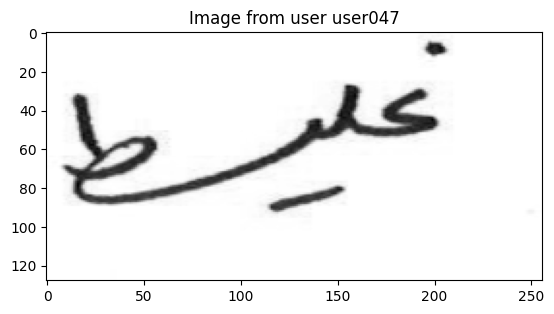

In [ ]:
# Function to load images from a folder
def load_images_from_folder(folder_path):
    images = []
    labels = []

    # Iterate through user folders
    for user_folder in os.listdir(folder_path):
        user_path = os.path.join(folder_path, user_folder)
        if os.path.isdir(user_path):
            for image_file in os.listdir(user_path):
                img_path = os.path.join(user_path, image_file)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load image in grayscale
                if img is not None:
                    images.append(img)
                    labels.append(user_folder)  # Store the folder name as the label (user ID)
                else:
                    print(f"Warning: Skipping corrupted image {img_path}")
    return images, labels

# Function to preprocess images: Resize to 256x128
def preprocess_images(images, size=(256, 128)):
    processed_images = []
    for img in images:
        resized_img = cv2.resize(img, size)  # Resize images
        processed_images.append(resized_img)
    return processed_images

# Load images from the dataset folder
dataset_path = './isolated_words_per_user'  # Change this to your dataset path
images, labels = load_images_from_folder(dataset_path)



# Preprocess images (resize to 256x128)
processed_images = preprocess_images(images)

# Display some basic stats
print(f"Number of images loaded: {len(processed_images)}")
print(f"Image dimensions (after resizing): {processed_images[0].shape}")
print(f"Unique users (labels): {len(set(labels))}")

# Display the first processed image to verify
plt.imshow(processed_images[0], cmap='gray')
plt.title(f"Image from user {labels[0]}")
plt.show()


# Data Augmentation

In [ ]:
# import cv2
# import numpy as np
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# import matplotlib.pyplot as plt
# from concurrent.futures import ThreadPoolExecutor

# # Function to augment images and labels in parallel
# def augment_images_and_labels(images, labels, num_augmented_images=3, batch_size=32):
#     # Initialize ImageDataGenerator with common augmentations
#     datagen = ImageDataGenerator(
#         rotation_range=30,       # Rotate images by a random degree up to 30
#         width_shift_range=0.01,   # Shift images horizontally by 10% of width
#         height_shift_range=0.01,  # Shift images vertically by 10% of height
#         zoom_range=0.05,         # Random zooming
#         fill_mode='nearest'      # Fill empty pixels with the nearest value
#     )

#     augmented_images = []
#     augmented_labels = []

#     # Convert images to the correct shape for augmentation (adding channel dimension)
#     images_reshaped = [img.reshape((1, img.shape[0], img.shape[1], 1)) for img in images]

#     # Augment images in parallel
#     def augment_single_image(img, label):
#         augmented_images_for_label = []
#         for batch in datagen.flow(img, batch_size=1):
#             augmented_images_for_label.append(batch[0].astype(np.uint8))  # Add augmented image
#             augmented_labels.append(label)  # Add corresponding label
#             if len(augmented_images_for_label) >= num_augmented_images:
#                 break
#         return augmented_images_for_label

#     # Use ThreadPoolExecutor to parallelize the augmentation process
#     with ThreadPoolExecutor() as executor:
#         results = list(executor.map(lambda x: augment_single_image(x[0], x[1]), zip(images_reshaped, labels)))

#     # Flatten the results and append to augmented_images and augmented_labels
#     for result in results:
#         augmented_images.extend(result)

#     return augmented_images, augmented_labels

# # Augment images and labels
# augmented_images, augmented_labels = augment_images_and_labels(processed_images, labels)

# # Convert both original and augmented images to 2D (grayscale)
# augmented_images_2d = [img.reshape(img.shape[0], img.shape[1]) for img in augmented_images]

# # Combine original and augmented images
# all_images = np.concatenate([processed_images, augmented_images_2d], axis=0)
# all_labels = np.concatenate([labels, augmented_labels], axis=0)

# # Check the dataset size
# print("Original dataset size:", len(processed_images))
# print("Augmented dataset size:", len(all_images))
# print("Augmented labels size:", len(all_labels))

# # Visualize one of the augmented images
# plt.imshow(all_images[0], cmap='gray')
# plt.title(f"Augmented Image of User {all_labels[0]}")
# plt.show()

# # Ensure the number of images and labels are consistent before splitting
# assert len(all_images) == len(all_labels), "Number of images and labels do not match!"

In [ ]:
# # Visualize one of the augmented images
# plt.imshow(all_images[28000], cmap='gray')
# plt.title("Augmented Image")
# plt.show()

# Split the Dataset

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import random

# Split into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    processed_images, labels, test_size=0.2, random_state=42
)

# Train the LabelEncoder on the training labels
label_encoder = LabelEncoder()
encoded_train_labels = label_encoder.fit_transform(y_train)

# Encode the test labels using the same LabelEncoder
encoded_test_labels = label_encoder.transform(y_test)


# Print training and testing set sizes and encoded labels
print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")
print(f"Unique labels in the training set: {len(label_encoder.classes_)}")
print(f"All labels (encoded): {encoded_train_labels}")





Training set size: 6515
Testing set size: 1629
Unique labels in the training set: 82
All labels (encoded): [70  1 27 ... 21 33 61]


# Feature Extraction using SIFT and ORB for training data




Extracting Features (SIFT): 100%|██████████| 6515/6515 [01:28<00:00, 74.03it/s]


Feature extraction (SIFT) took 88.83 seconds


Extracting Features (ORB): 100%|██████████| 6515/6515 [00:12<00:00, 519.66it/s]


Feature extraction (ORB) took 13.40 seconds


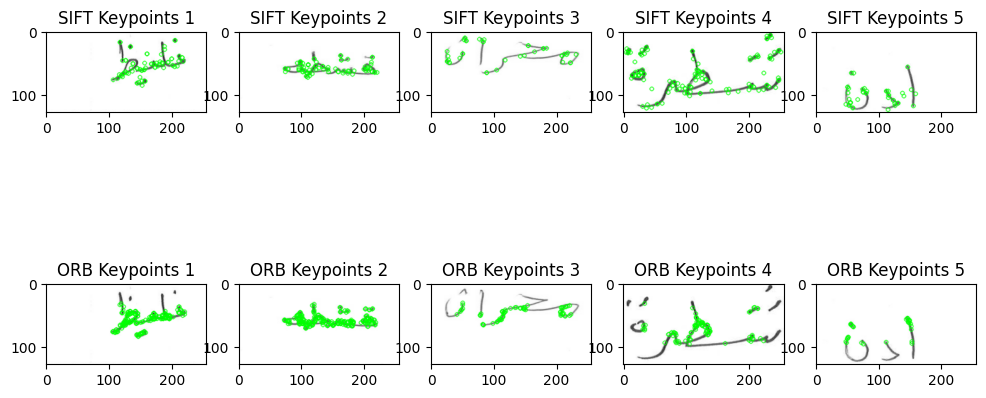

Number of SIFT keypoints: 89.17
Number ORB keypoints: 168.57
SIFT execution time: 88.83 seconds
ORB execution time: 13.40 seconds


In [ ]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
from concurrent.futures import ThreadPoolExecutor
from tqdm import tqdm
import time

# Function to extract features (SIFT/ORB) with execution time recording
def extract_features(images, feature_type='sift'):
    if feature_type not in ['sift', 'orb']:
        raise ValueError(f"Unsupported feature type. Choose 'sift' or 'orb', but got '{feature_type}'.")

    # Initialize the detector based on feature_type
    detector = cv2.SIFT_create() if feature_type == 'sift' else cv2.ORB_create()

    def process_image(img):
        keypoints, descriptors = detector.detectAndCompute(img, None)  # Detect keypoints and compute descriptors
        return keypoints, descriptors

    # Record start time
    start_time = time.time()

    # Use ThreadPoolExecutor for parallel feature extraction and tqdm for progress bar
    with ThreadPoolExecutor() as executor:
        results = list(tqdm(executor.map(process_image, images), total=len(images), desc=f"Extracting Features ({feature_type.upper()})"))

    # Record end time
    end_time = time.time()
    elapsed_time = end_time - start_time

    keypoints_list = [result[0] for result in results]
    descriptors_list = [result[1] for result in results]

    print(f"Feature extraction ({feature_type.upper()}) took {elapsed_time:.2f} seconds")
    return keypoints_list, descriptors_list, elapsed_time

# Function to draw keypoints on an image
def draw_keypoints(img, keypoints, feature_type='sift'):
    if feature_type not in ['sift', 'orb']:
        raise ValueError(f"Unsupported feature type. Choose 'sift' or 'orb', but got '{feature_type}'.")

    color = (0, 255, 0)  # Green color for keypoints
    return cv2.drawKeypoints(img, keypoints, None, color=color)

# Function to visualize keypoints on multiple images
def visualize_keypoints(images, keypoints_sift, keypoints_orb, num_images=5):
    plt.figure(figsize=(12, 6))

    for i, (img, kp_sift, kp_orb) in enumerate(zip(images[:num_images], keypoints_sift[:num_images], keypoints_orb[:num_images])):
        img_sift = draw_keypoints(img, kp_sift, feature_type='sift')
        img_orb = draw_keypoints(img, kp_orb, feature_type='orb')

        plt.subplot(2, num_images, i+1)
        plt.imshow(img_sift, cmap='gray')
        plt.title(f"SIFT Keypoints {i+1}")

        plt.subplot(2, num_images, num_images+i+1)
        plt.imshow(img_orb, cmap='gray')
        plt.title(f"ORB Keypoints {i+1}")

    plt.show()

# Count and compare the number of keypoints for each image
def compare_keypoints(keypoints_sift, keypoints_orb):
    sift_counts = [len(kp) for kp in keypoints_sift]
    orb_counts = [len(kp) for kp in keypoints_orb]

    print(f"Number of SIFT keypoints: {np.mean(sift_counts):.2f}")
    print(f"Number ORB keypoints: {np.mean(orb_counts):.2f}")

    return sift_counts, orb_counts

keypoints_sift_train, descriptors_sift_train , time_sift= extract_features(X_train, feature_type='sift')
keypoints_orb_train, descriptors_orb_train, time_orb = extract_features(X_train, feature_type='orb')

# Visualize keypoints for the first few training images
visualize_keypoints(X_train, keypoints_sift_train, keypoints_orb_train, num_images=5)

# Compare keypoints
sift_counts, orb_counts = compare_keypoints(keypoints_sift_train, keypoints_orb_train)

# Display execution times
print(f"SIFT execution time: {time_sift:.2f} seconds")
print(f"ORB execution time: {time_orb:.2f} seconds")




#Key point matching using SIFT

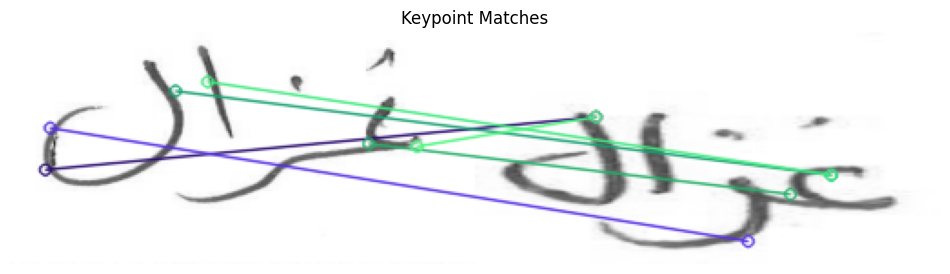

Matching Percentage: 11.11%


In [ ]:
# Function to match keypoints between two sets of descriptors
def match_keypoints(descriptors1, descriptors2, feature_type='sift', ratio_test=True):
    # Choose the distance metric based on feature type
    norm_type = cv2.NORM_L2 if feature_type == 'sift' else cv2.NORM_HAMMING

    # Initialize matcher
    bf = cv2.BFMatcher(norm_type, crossCheck=not ratio_test)

    # Perform the matching
    if ratio_test:
        # KNN matching for Lowe's ratio test
        matches = bf.knnMatch(descriptors1, descriptors2, k=2)
        good_matches = []
        for m, n in matches:
            if m.distance < 0.75 * n.distance:  # Lowe's ratio test threshold
                good_matches.append(m)
    else:
        # Cross-checked matching
        good_matches = bf.match(descriptors1, descriptors2)
        good_matches = sorted(good_matches, key=lambda x: x.distance)

    return good_matches

# Function to visualize matches
def visualize_matches(img1, img2, keypoints1, keypoints2, matches, num_matches=20):
    matched_img = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches[:num_matches], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    plt.figure(figsize=(12, 6))
    plt.imshow(matched_img)
    plt.title("Keypoint Matches")
    plt.axis('off')
    plt.show()

# Function to calculate matching percentage
def calculate_matching_percentage(matches, keypoints1, keypoints2):
    num_good_matches = len(matches)
    num_keypoints_img1 = len(keypoints1)
    num_keypoints_img2 = len(keypoints2)

    matching_percentage = (num_good_matches / min(num_keypoints_img1, num_keypoints_img2)) * 100
    return matching_percentage

# Example of matching between two images in the training set
img1, img2 = X_train[10], X_train[11]  # Replace indices with the ones you want to compare
kp1, desc1 = keypoints_sift_train[10], descriptors_sift_train[10]
kp2, desc2 = keypoints_sift_train[11], descriptors_sift_train[11]

# Match keypoints and visualize
matches = match_keypoints(desc1, desc2, feature_type='sift', ratio_test=True)
visualize_matches(img1, img2, kp1, kp2, matches, num_matches=20)

matching_percentage = calculate_matching_percentage(matches, kp1, kp2)

# Display matches and percentage
print(f"Matching Percentage: {matching_percentage:.2f}%")







# Key point matching using ORB

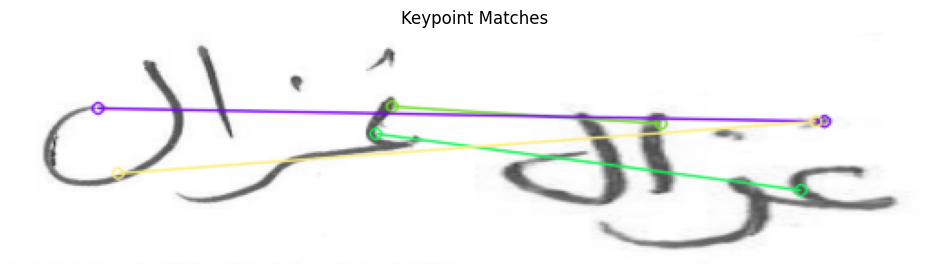

Matching Percentage: 5.26%


In [ ]:

# Example of matching between two images in the training se
img1, img2 = X_train[10], X_train[11]  # Replace indices with the ones you want to compare
kp1, desc1 = keypoints_orb_train[10], descriptors_orb_train[10]
kp2, desc2 = keypoints_orb_train[11], descriptors_orb_train[11]
matches = match_keypoints(desc1, desc2, feature_type='orb', ratio_test=True)

visualize_matches(img1, img2, kp1, kp2, matches, num_matches=20)

matching_percentage = calculate_matching_percentage(matches, kp1, kp2)

# Display matches and percentage
print(f"Matching Percentage: {matching_percentage:.2f}%")




#Visual Bag of Words (BoW) for training data





In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from tqdm import tqdm  # Importing tqdm for the progress bar

# Function to construct the Bag of Words (BoW) model using KMeans (CPU-based)
def construct_bow_model_cpu(descriptors_list, num_clusters=50):
    # Flatten the list of descriptors from all images into one large list
    all_descriptors = [descriptor for descriptors in descriptors_list if descriptors is not None for descriptor in descriptors]

    if len(all_descriptors) == 0:
        raise ValueError("No valid descriptors found. Ensure descriptors are extracted properly.")

    # Convert the list of descriptors to a numpy array
    all_descriptors = np.vstack(all_descriptors)

    # Apply KMeans clustering using scikit-learn (CPU-based)
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(all_descriptors)

    return kmeans

# Function to represent an image as a histogram of visual words
def represent_image_as_histogram_cpu(descriptors, vocabulary):
    # Initialize a histogram with zeros
    histogram = np.zeros(len(vocabulary.cluster_centers_))

    if descriptors is not None and len(descriptors) > 0:
        # Assign each descriptor to a visual word and update the histogram
        words = vocabulary.predict(descriptors)
        for word in words:
            histogram[word] += 1

    # Normalize the histogram (important for BoW representation)
    histogram = normalize(histogram.reshape(1, -1), norm='l2')

    return histogram

# Function to convert a list of descriptors to histograms for all images
def convert_images_to_histograms_cpu(descriptors_list, vocabulary):
    histograms = []
    for descriptors in tqdm(descriptors_list, desc="Converting images to histograms", unit="image"):  # Adding progress bar
        histograms.append(represent_image_as_histogram_cpu(descriptors, vocabulary))

    return np.array(histograms)

# Ensure we have valid descriptors for training data
if keypoints_sift_train and keypoints_orb_train:
    print("Constructing BoW model using SIFT descriptors (Training Data)...")
    # Construct the Bag of Words model using SIFT descriptors (on training data only)
    vocabulary_sift_train = construct_bow_model_cpu(descriptors_sift_train, num_clusters=500)

    print("Converting training images to histograms using SIFT vocabulary...")
    # Convert training images to histograms using the SIFT vocabulary
    histograms_sift_train = convert_images_to_histograms_cpu(descriptors_sift_train, vocabulary_sift_train)

    print("Constructing BoW model using ORB descriptors (Training Data)...")
    # Construct the Bag of Words model using ORB descriptors (on training data only)
    vocabulary_orb_train = construct_bow_model_cpu(descriptors_orb_train, num_clusters=500)

    print("Converting training images to histograms using ORB vocabulary...")
    # Convert training images to histograms using the ORB vocabulary
    histograms_orb_train = convert_images_to_histograms_cpu(descriptors_orb_train, vocabulary_orb_train)

    # Print the shape of the histograms for verification
    print(f"Shape of SIFT histograms (Training Data): {histograms_sift_train.shape}")
    print(f"Shape of ORB histograms (Training Data): {histograms_orb_train.shape}")

else:
    print("Error: No descriptors found for SIFT or ORB in training data. Check feature extraction process.")


Constructing BoW model using SIFT descriptors (Training Data)...
Converting training images to histograms using SIFT vocabulary...


Converting images to histograms: 100%|██████████| 6515/6515 [00:08<00:00, 754.50image/s]


Constructing BoW model using ORB descriptors (Training Data)...
Converting training images to histograms using ORB vocabulary...


Converting images to histograms: 100%|██████████| 6515/6515 [00:09<00:00, 701.05image/s]

Shape of SIFT histograms (Training Data): (6515, 1, 500)
Shape of ORB histograms (Training Data): (6515, 1, 500)


# Extract Features for Test Data



In [ ]:
# Extract SIFT and ORB features for the test dataset
keypoints_sift_test, descriptors_sift_test = extract_features(X_test, feature_type='sift')
keypoints_orb_test, descriptors_orb_test = extract_features(X_test, feature_type='orb')

print("Feature extraction for test data completed!")


Extracting Features: 100%|██████████| 1629/1629 [00:03<00:00, 536.47it/s]

Feature extraction for test data completed!


# Represent Test Data as BoW Histograms

In [ ]:
# Ensure the vocabularies are from the training data
if vocabulary_sift_train and vocabulary_orb_train:
    print("Converting test images to histograms using SIFT vocabulary...")
    histograms_sift_test = convert_images_to_histograms_cpu(descriptors_sift_test, vocabulary_sift_train)

    print("Converting test images to histograms using ORB vocabulary...")
    histograms_orb_test = convert_images_to_histograms_cpu(descriptors_orb_test, vocabulary_orb_train)

    # Print the shapes for verification
    print(f"Shape of SIFT histograms (Test Data): {histograms_sift_test.shape}")
    print(f"Shape of ORB histograms (Test Data): {histograms_orb_test.shape}")
else:
    print("Error: Vocabularies for SIFT or ORB are missing. Ensure they are constructed from training data.")

Converting test images to histograms using SIFT vocabulary...


Converting images to histograms: 100%|██████████| 1629/1629 [00:03<00:00, 486.63image/s]


Converting test images to histograms using ORB vocabulary...


Converting images to histograms: 100%|██████████| 1629/1629 [00:02<00:00, 691.91image/s]

Shape of SIFT histograms (Test Data): (1629, 1, 500)
Shape of ORB histograms (Test Data): (1629, 1, 500)


# Training a Classifier using SIFT Features.

Performing GridSearchCV...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best hyperparameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Test Accuracy: 42.85%

Classification Report:
              precision    recall  f1-score   support

     user001       0.58      0.37      0.45        30
     user002       0.32      0.47      0.38        17
     user003       0.25      0.31      0.28        16
     user004       0.22      0.12      0.16        16
     user005       0.42      0.26      0.32        19
     user006       0.14      0.20      0.17        15
     user007       0.11      0.23      0.15        13
     user008       0.71      0.65      0.68        23
     user009       0.50      0.45      0.48        22
     user010       0.43      0.26      0.32        23
     user011       0.71      0.57      0.63        30
     user012       0.33      0.33      0.33        21
     user013       0.31      0.24      0.27        21
     user014       0.50      0.41      0.45

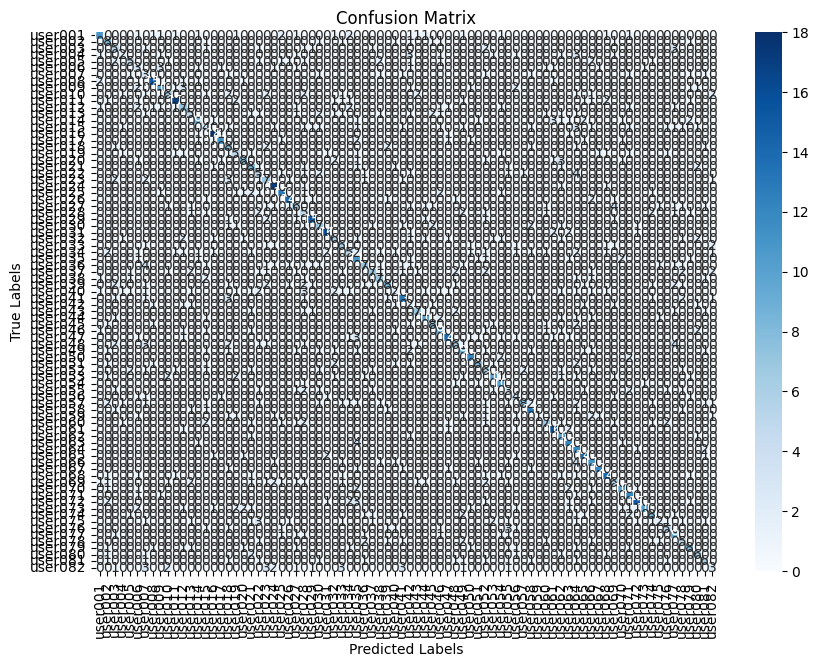

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Use BoW histograms from previous cells
# histograms_sift_train and histograms_sift_test are from the earlier BoW steps
X_train = histograms_sift_train  # SIFT histograms for training
X_test = histograms_sift_test    # SIFT histograms for testing
y_train = y_train                # Training labels
y_test = y_test                  # Testing labels


# Flatten the histograms if they are 3D
if X_train.ndim == 3:
    X_train = X_train.reshape(X_train.shape[0], -1)
if X_test.ndim == 3:
    X_test = X_test.reshape(X_test.shape[0], -1)
# Step 2: Scale the BoW histograms
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Define the SVM model and hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10],           # Regularization strength
    'kernel': ['linear', 'rbf'], # Linear and RBF kernels
    'gamma': ['scale', 'auto']   # Kernel coefficient
}
svm_model = SVC(random_state=42)

# Step 4: Perform GridSearchCV for Hyperparameter Tuning
print("Performing GridSearchCV...")
grid_search = GridSearchCV(svm_model, param_grid, cv=3, verbose=2, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Step 5: Get the best model from GridSearchCV
best_svm_model = grid_search.best_estimator_
print("Best hyperparameters:", grid_search.best_params_)

# Step 6: Predict on the test set
y_pred = best_svm_model.predict(X_test_scaled)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 8: Visualize the Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()




## Test the Model with a Random Image.



In [ ]:
# import random
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import LabelEncoder

# # Assuming histograms_sift is the SIFT feature matrix and all_labels are the true labels
# # Make sure you have a trained model (best_svm_model) and label_encoder

# # 1. Randomly select an image index from the test set
# random_index = random.randint(0, len(X_test) - 1)

# # 2. Get the corresponding true label
# true_label = y_test[random_index]

# # Decode the true label back to the original writer (user)
# true_class = label_encoder.inverse_transform([true_label])[0]

# # 3. Predict using the trained SVM model
# predicted_label = best_svm_model.predict([X_test[random_index]])[0]

# # Decode the predicted label to the original writer (user)
# predicted_class = label_encoder.inverse_transform([predicted_label])[0]

# # 4. Display the results
# print(f"True Label: {true_class}")
# print(f"Predicted Label: {predicted_class}")


# img = all_images[random_index]  # Replace this with actual image data
# plt.imshow(img, cmap='gray')  # Adjust as necessary for color channels
# plt.title(f"True: {true_class} | Predicted: {predicted_class}")
# plt.axis('off')
# plt.show()

# # For now, if you only have histograms, you can skip the image display:
# print(f"Predicted Class: {predicted_class}")
# Import necessary libraries




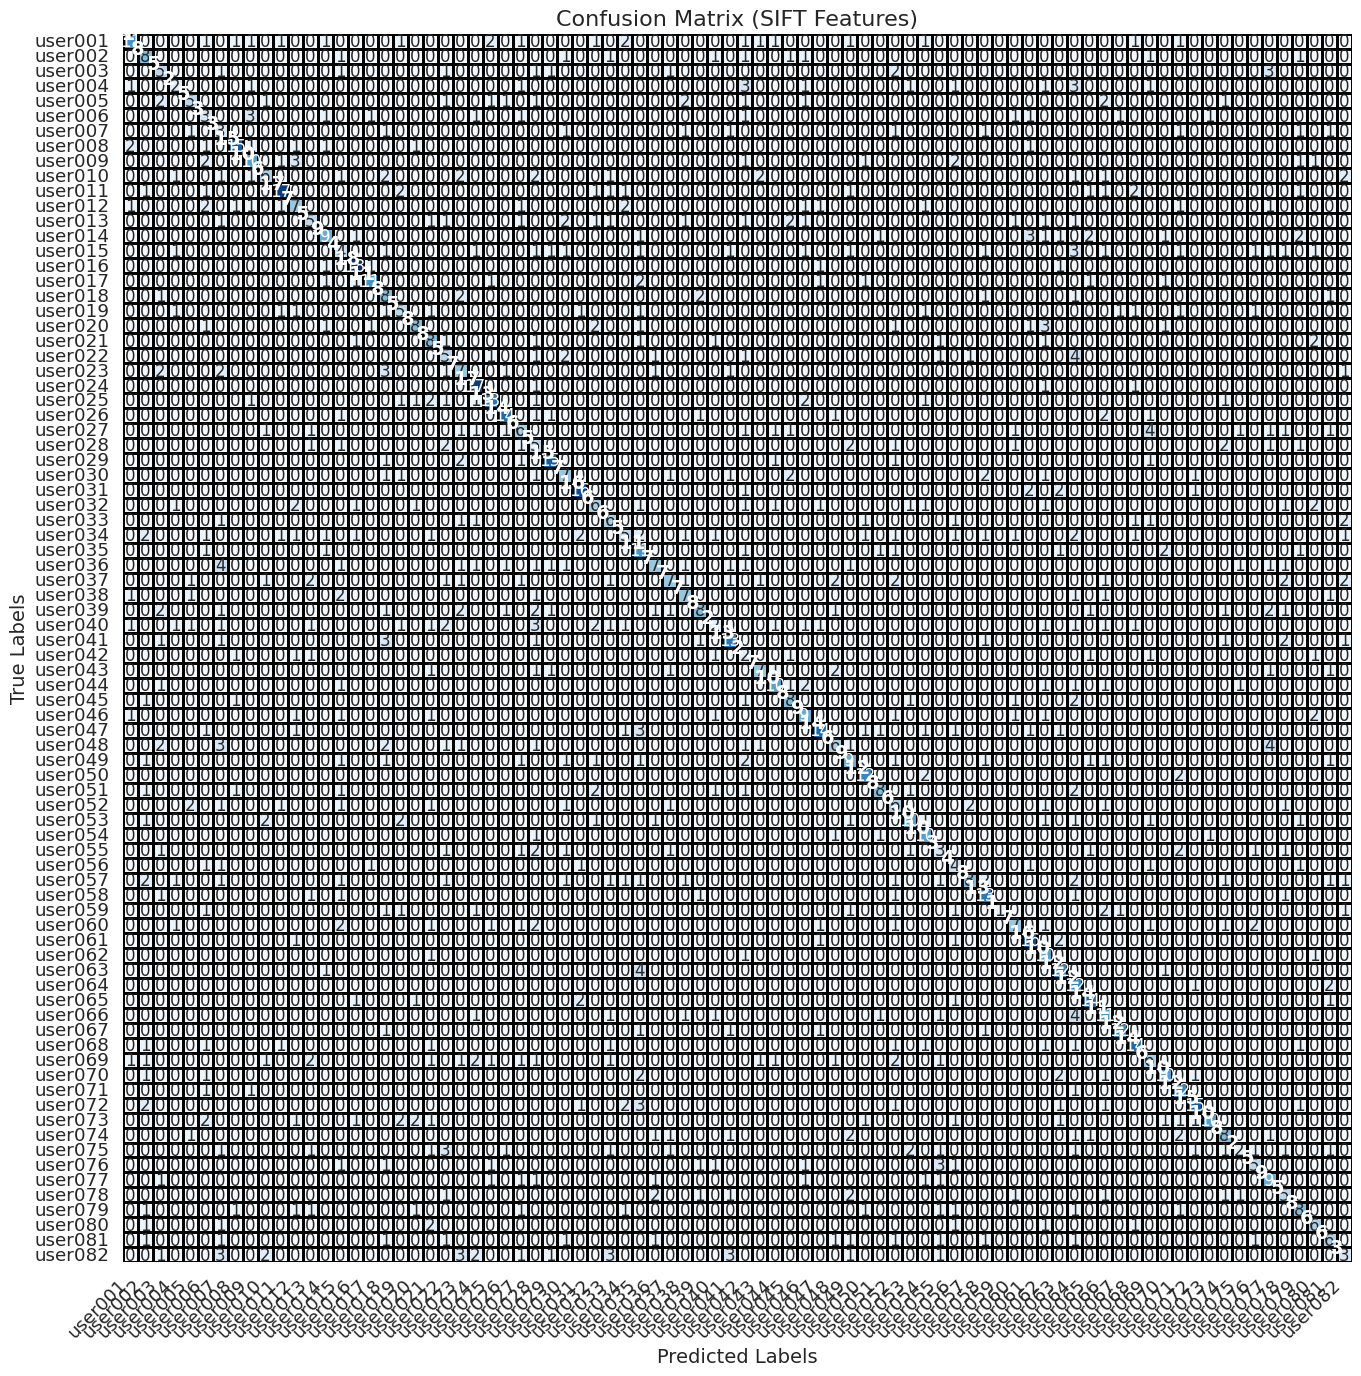

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.metrics import confusion_matrix

# # Assuming y_test and y_pred are already defined from your SVM predictions
# conf_matrix = confusion_matrix(y_test, y_pred)

# # Plot the confusion matrix with improved size and readability
# plt.figure(figsize=(18, 14))  # Increase the figure size
# sns.set(font_scale=1.2)  # Increase font size for clarity

# # Use a heatmap with a better color map and padding
# ax = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 12},
#                  cbar=False, linewidths=1, linecolor='black',
#                  xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_,
#                  square=True, cbar_kws={"shrink": 0.8})

# # Customize diagonal cells (correct predictions) to stand out
# for i in range(len(conf_matrix)):
#     ax.text(i, i, f'{conf_matrix[i, i]}', ha='center', va='center', color='white', fontweight='bold', fontsize=14)

# # Rotate the tick labels to avoid overlap
# plt.xticks(rotation=45, ha='right')
# plt.yticks(rotation=0)

# # Add title and labels
# plt.title("Confusion Matrix (SIFT Features)", fontsize=16)
# plt.xlabel("Predicted Labels", fontsize=14)
# plt.ylabel("True Labels", fontsize=14)

# plt.tight_layout()  # Make sure everything fits without overlap
# plt.show()




# Training a Classifier using ORB Features.





Performing GridSearchCV...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Test Accuracy: 26.46%

Classification Report:
              precision    recall  f1-score   support

     user001       0.29      0.07      0.11        30
     user002       0.25      0.41      0.31        17
     user003       0.18      0.31      0.23        16
     user004       0.10      0.12      0.11        16
     user005       0.09      0.11      0.10        19
     user006       0.18      0.13      0.15        15
     user007       0.23      0.46      0.31        13
     user008       0.50      0.35      0.41        23
     user009       0.26      0.41      0.32        22
     user010       0.39      0.30      0.34        23
     user011       0.50      0.27      0.35        30
     user012       0.14      0.14      0.14        21
     user013       0.27      0.14      0.19        21
     user014       0.17      0.18      0.1

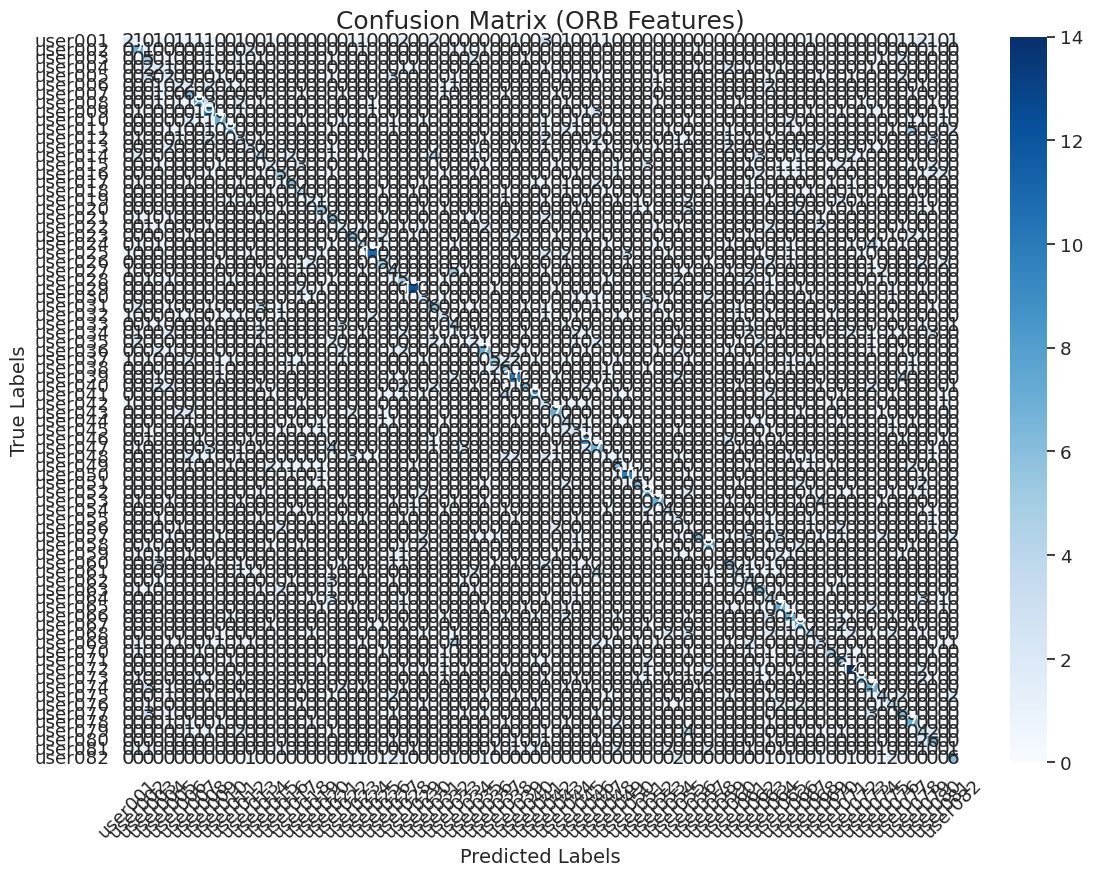

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Encode the labels
# Assuming `labels` is the original list of class labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  # Encode training labels
y_test_encoded = label_encoder.transform(y_test)        # Encode test labels

# Step 2: Use ORB histograms
X_train = histograms_orb_train  # ORB histograms for training
X_test = histograms_orb_test    # ORB histograms for testing

# Step 3: Flatten histograms if needed
if X_train.ndim == 3:
    X_train = X_train.reshape(X_train.shape[0], -1)
if X_test.ndim == 3:
    X_test = X_test.reshape(X_test.shape[0], -1)

# Step 4: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Define the SVM model and hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10],           # Regularization strength
    'kernel': ['linear', 'rbf'], # Linear and RBF kernels
    'gamma': ['scale', 'auto']   # Kernel coefficient
}
svm_model = SVC(random_state=42)

# Step 6: Perform GridSearchCV for hyperparameter tuning
print("Performing GridSearchCV...")
grid_search = GridSearchCV(svm_model, param_grid, cv=3, verbose=2, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train_encoded)

# Step 7: Get the best model from GridSearchCV
best_svm_model = grid_search.best_estimator_
print("Best hyperparameters:", grid_search.best_params_)

# Step 8: Predict on the test set
y_pred = best_svm_model.predict(X_test_scaled)

# Step 9: Evaluate the model
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:")
# print(classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_))
print(classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_, zero_division=1))


# Step 10: Visualize the Confusion Matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred)
plt.figure(figsize=(12, 9))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix (ORB Features)", fontsize=18)
plt.xlabel("Predicted Labels", fontsize=14)
plt.ylabel("True Labels", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()






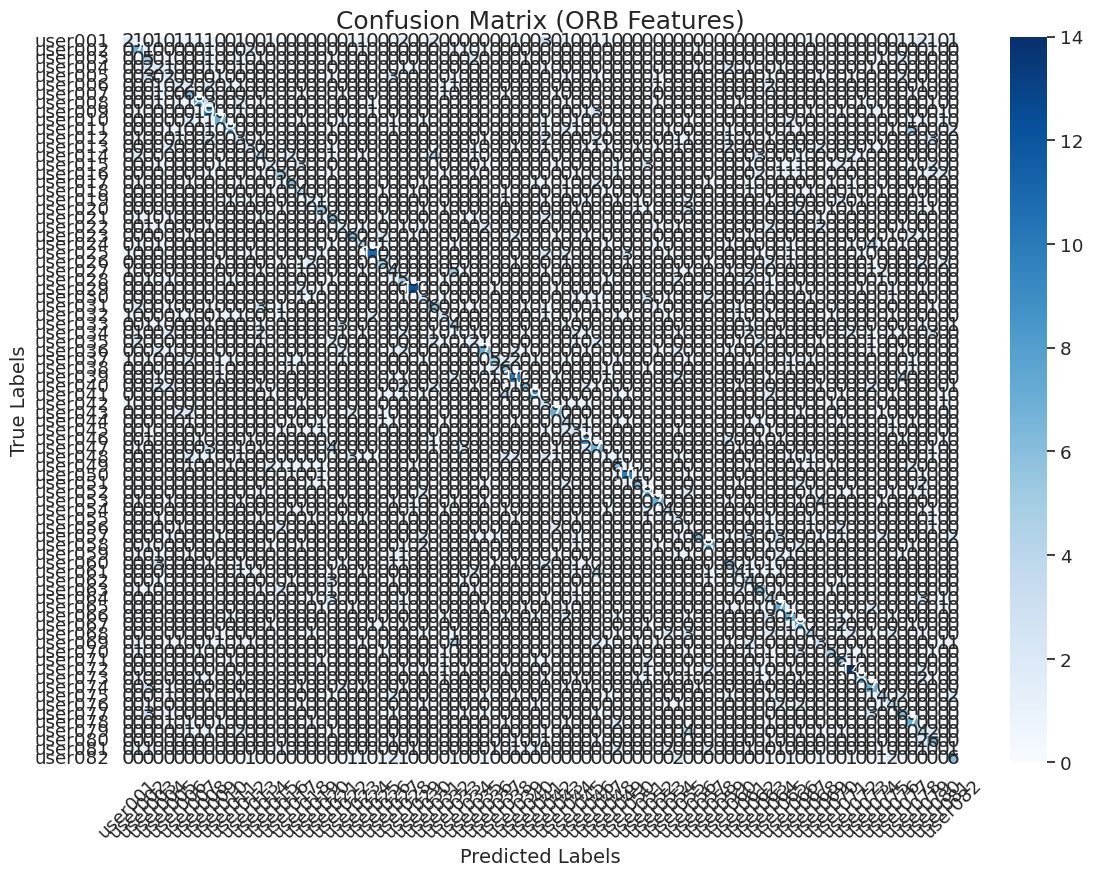

In [ ]:
# Optionally, visualize the confusion matrix

conf_matrix = confusion_matrix(y_test_encoded, y_pred)
plt.figure(figsize=(12, 9))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix (ORB Features)", fontsize=18)
plt.xlabel("Predicted Labels", fontsize=14)
plt.ylabel("True Labels", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



